In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [21]:
df_train = pd.read_csv('train.csv')
df_train.drop('id',axis=1, inplace = True)
df_test = pd.read_csv('test.csv')
df_test.drop('id',axis=1, inplace = True)

In [22]:
df_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [23]:
print(df_train['type'].unique())
print(df_train['color'].unique())

['Ghoul' 'Goblin' 'Ghost']
['clear' 'green' 'black' 'white' 'blue' 'blood']


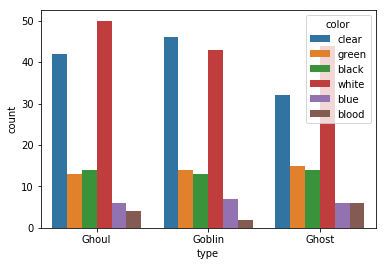

In [24]:
sns.countplot(x='type', hue="color", data = df_train)

In [25]:
df_train.drop('color',axis=1, inplace = True)
df_test.drop('color',axis=1, inplace = True)

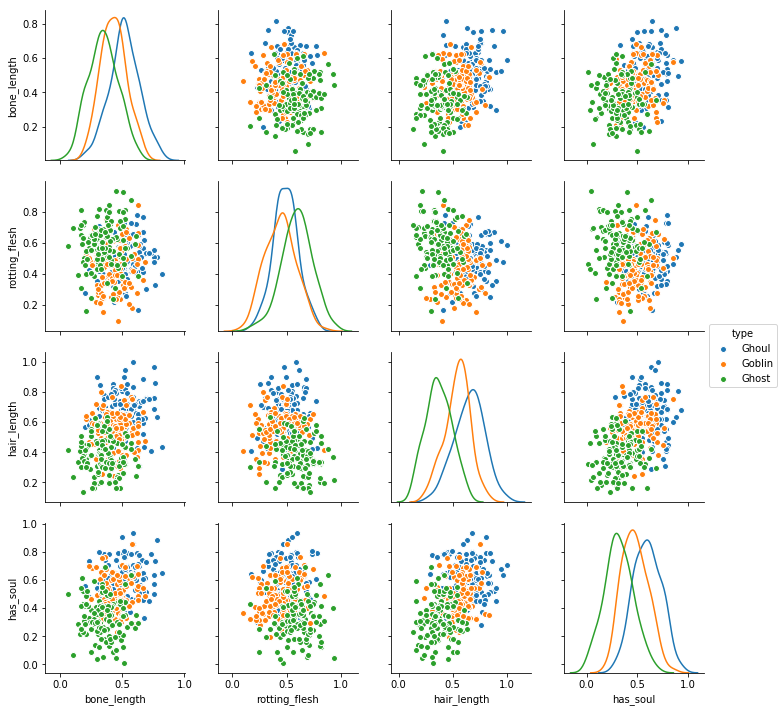

In [26]:
sns.pairplot(data= df_train, hue='type', diag_kind='kde')

In [27]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train.drop('type',axis=1))
test_scaled = scaler.fit_transform(df_test)

In [28]:
X_train = train_scaled
y_train = df_train['type']

In [29]:
rfc = RandomForestClassifier(n_estimators=1000,)
scores = cross_val_score(rfc, X_train, y_train, cv=6)

In [30]:
scores.mean()

0.72690389452684545

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors =11)
scores = cross_val_score(knn, X_train, y_train, cv=6)
scores.mean()

0.72981394743689831

In [33]:
from sklearn.svm import SVC

In [34]:
svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=6)
scores.mean()

0.72720964524243215

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5,1, 5, 10, 25,50, 75,100], 'gamma': np.linspace(0,1,100)} 

In [48]:
grid = GridSearchCV(svc,param_grid,refit=True,verbose=0)
scores = cross_val_score(grid, X_train, y_train, cv=12)
scores.mean()

0.76767878661475708

In [49]:
scores

array([ 0.75      ,  0.75      ,  0.84375   ,  0.8125    ,  0.75      ,
        0.80645161,  0.83870968,  0.77419355,  0.64516129,  0.79310345,
        0.79310345,  0.65517241])

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
adc = AdaBoostClassifier()
scores = cross_val_score(adc, X_train, y_train, cv=12)
scores.mean()

0.67299893400074151